# Image To Text and Audio Conversion

In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
import easyocr
import pyttsx3

C:\Users\KAAD\.conda\envs\project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
reader=easyocr.Reader(['en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


In [5]:
result=reader.readtext('The.jpg')

In [6]:
result

[([[96, 216], [448, 216], [448, 264], [96, 264]],
  'The human brain',
  0.9971621300157751),
 ([[97, 281], [175, 281], [175, 317], [97, 317]], 'can', 0.9991280316688943),
 ([[178, 270], [474, 270], [474, 327], [178, 327]],
  'process entire',
  0.9998468907644541),
 ([[93, 326], [516, 326], [516, 381], [93, 381]],
  'images that the eye',
  0.9792282426489519),
 ([[95, 383], [491, 383], [491, 427], [95, 427]],
  'sees for as little as',
  0.9216560373160608),
 ([[128, 460], [457, 460], [457, 508], [128, 508]],
  '13 milliseconds.',
  0.8786933109109217),
 ([[19, 695], [143, 695], [143, 709], [19, 709]],
  'Source: Trafton; Anne-',
  0.4896826026676288),
 ([[147, 693], [275, 693], [275, 711], [147, 711]],
  '"In the Blink of an Eye',
  0.9684883035080888),
 ([[281, 693], [717, 693], [717, 709], [281, 709]],
  "'MIT News; 16 Jan: 2014, news mit edu/2014/in-the-blink-of-an-eye-0116.",
  0.36243614948890807)]

In [7]:
text=''

for i in range(len(result)):
    text=text+' '+result[i][1]
    
print(text)

 The human brain can process entire images that the eye sees for as little as 13 milliseconds. Source: Trafton; Anne- "In the Blink of an Eye 'MIT News; 16 Jan: 2014, news mit edu/2014/in-the-blink-of-an-eye-0116.


In [8]:
print(result[0][1])

The human brain


In [9]:
top_left=tuple(result[0][0][0])
bottom_right=tuple(result[0][0][2])
text=result[0][1]
font=cv2.FONT_HERSHEY_SIMPLEX

In [10]:
top_left

(96, 216)

In [11]:
bottom_right

(448, 264)

In [12]:
text

'The human brain'

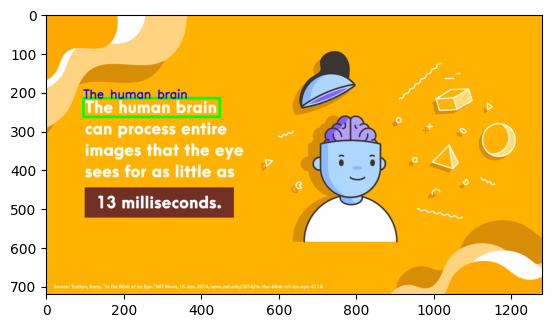

In [13]:
img=cv2.imread('The.jpg')
img=cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img=cv2.putText(img, text, top_left,font, 1, (0,0,255),2, cv2.LINE_AA)
plt.imshow(img)
plt.show()

The human brain
can
process entire
images that the eye
sees for as little as
13 milliseconds.
Source: Trafton; Anne-
"In the Blink of an Eye
'MIT News; 16 Jan: 2014, news mit edu/2014/in-the-blink-of-an-eye-0116.


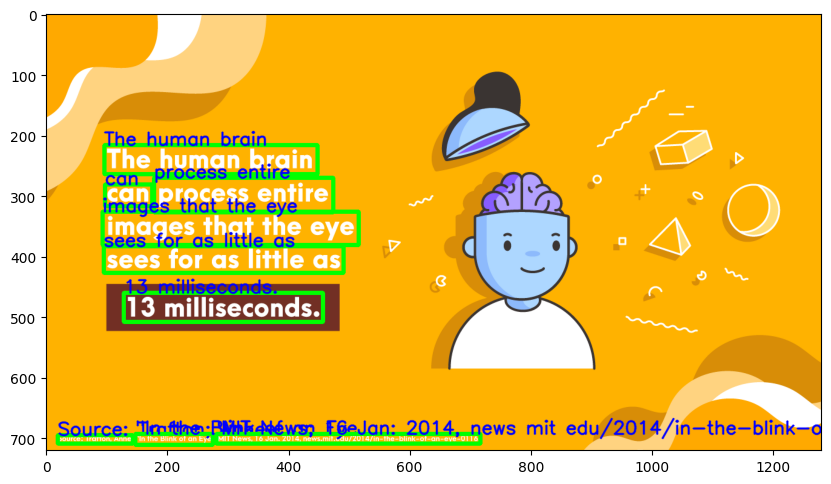

In [14]:
# Handling Multiple lines

img=cv2.imread('The.jpg')
for detection in result:
    top_left=tuple([int(val) for val in detection[0][0]])
    bottom_right=tuple([int(val) for val in detection[0][2]])
    text=detection[1]
    print(text)
    font=cv2.FONT_HERSHEY_SIMPLEX
    img=cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
    img=cv2.putText(img, text, top_left,font, 1, (0,0,255),2, cv2.LINE_AA)
    
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [15]:
# Reading the text and converting into scentense

# Handling Multiple lines
import cv2
img=cv2.imread('The.jpg')
text=''
for detection in result:
    top_left=tuple([int(val) for val in detection[0][0]])
    bottom_right=tuple([int(val) for val in detection[0][2]])
    text=text+' '+detection[1]
print(text)


# Calculating number of words
len(text.split())

 The human brain can process entire images that the eye sees for as little as 13 milliseconds. Source: Trafton; Anne- "In the Blink of an Eye 'MIT News; 16 Jan: 2014, news mit edu/2014/in-the-blink-of-an-eye-0116.


34

In [16]:
import pyttsx3
engine = pyttsx3.init()
engine.setProperty('rate', 130)
engine.say(text)
engine.runAndWait()